In [1]:
import pandas as pd
import numpy as np
import calendar 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [15]:
#read the three separate csv files
acc_data1 = pd.read_csv('accidents_2005_to_2007.csv')
acc_data2 = pd.read_csv('accidents_2009_to_2011.csv')
acc_data3 = pd.read_csv('accidents_2012_to_2014.csv')

In [16]:
#merge all the data into one dataset
accident_data = pd.concat([acc_data1,acc_data2,acc_data3])

In [4]:
accident_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
#check for null values
accident_data.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [7]:
#check the types of the data
accident_data.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [19]:
accident_data['Date'] = pd.to_datetime(accident_data['Date'])

In [20]:
accident_data['Time'] = pd.to_datetime(accident_data['Time'])

In [21]:
accident_data.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                           datetime64[ns]
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

In [23]:
accident_data['Date']

0        2005-04-01
1        2005-05-01
2        2005-06-01
3        2005-07-01
4        2005-10-01
5        2005-11-01
6        2005-01-13
7        2005-01-14
8        2005-01-15
9        2005-01-15
10       2005-01-16
11       2005-01-25
12       2005-11-01
13       2005-01-18
14       2005-01-18
15       2005-01-18
16       2005-01-20
17       2005-01-21
18       2005-01-21
19       2005-08-01
20       2005-01-24
21       2005-01-24
22       2005-01-24
23       2005-01-18
24       2005-01-29
25       2005-01-19
26       2005-01-30
27       2005-01-29
28       2005-01-02
29       2005-02-02
            ...    
464667   2014-09-09
464668   2014-09-14
464669   2014-08-08
464670   2014-09-16
464671   2014-09-20
464672   2014-09-21
464673   2014-09-21
464674   2014-09-24
464675   2014-05-10
464676   2014-03-10
464677   2014-06-10
464678   2014-09-27
464679   2014-10-14
464680   2014-10-25
464681   2014-10-28
464682   2014-05-11
464683   2014-07-11
464684   2014-05-06
464685   2014-11-17


In [24]:
accident_data['Time']

0        2019-11-02 17:42:00
1        2019-11-02 17:36:00
2        2019-11-02 00:15:00
3        2019-11-02 10:35:00
4        2019-11-02 21:13:00
5        2019-11-02 12:40:00
6        2019-11-02 20:40:00
7        2019-11-02 17:35:00
8        2019-11-02 22:43:00
9        2019-11-02 16:00:00
10       2019-11-02 00:42:00
11       2019-11-02 20:48:00
12       2019-11-02 12:55:00
13       2019-11-02 05:01:00
14       2019-11-02 11:15:00
15       2019-11-02 10:50:00
16       2019-11-02 00:15:00
17       2019-11-02 09:15:00
18       2019-11-02 21:16:00
19       2019-11-02 03:00:00
20       2019-11-02 21:45:00
21       2019-11-02 17:05:00
22       2019-11-02 21:30:00
23       2019-11-02 17:25:00
24       2019-11-02 07:34:00
25       2019-11-02 16:35:00
26       2019-11-02 20:00:00
27       2019-11-02 13:15:00
28       2019-11-02 18:20:00
29       2019-11-02 07:25:00
                 ...        
464667   2019-11-02 12:00:00
464668   2019-11-02 00:01:00
464669   2019-11-02 14:30:00
464670   2019-

In [27]:
#correlation matrix
corr_matrix = accident_data.corr()
corr_matrix["Accident_Severity"].sort_values(ascending=False)

Accident_Severity             1.000000
Number_of_Vehicles            0.075976
2nd_Road_Class                0.064321
2nd_Road_Number               0.026128
Longitude                     0.013946
Location_Easting_OSGR         0.013465
1st_Road_Class                0.012754
Day_of_Week                   0.002961
1st_Road_Number              -0.004072
Year                         -0.005907
Latitude                     -0.031357
Location_Northing_OSGR       -0.031395
Police_Force                 -0.031712
Local_Authority_(District)   -0.031995
Speed_limit                  -0.079108
Urban_or_Rural_Area          -0.082169
Number_of_Casualties         -0.083544
Junction_Detail                    NaN
Name: Accident_Severity, dtype: float64

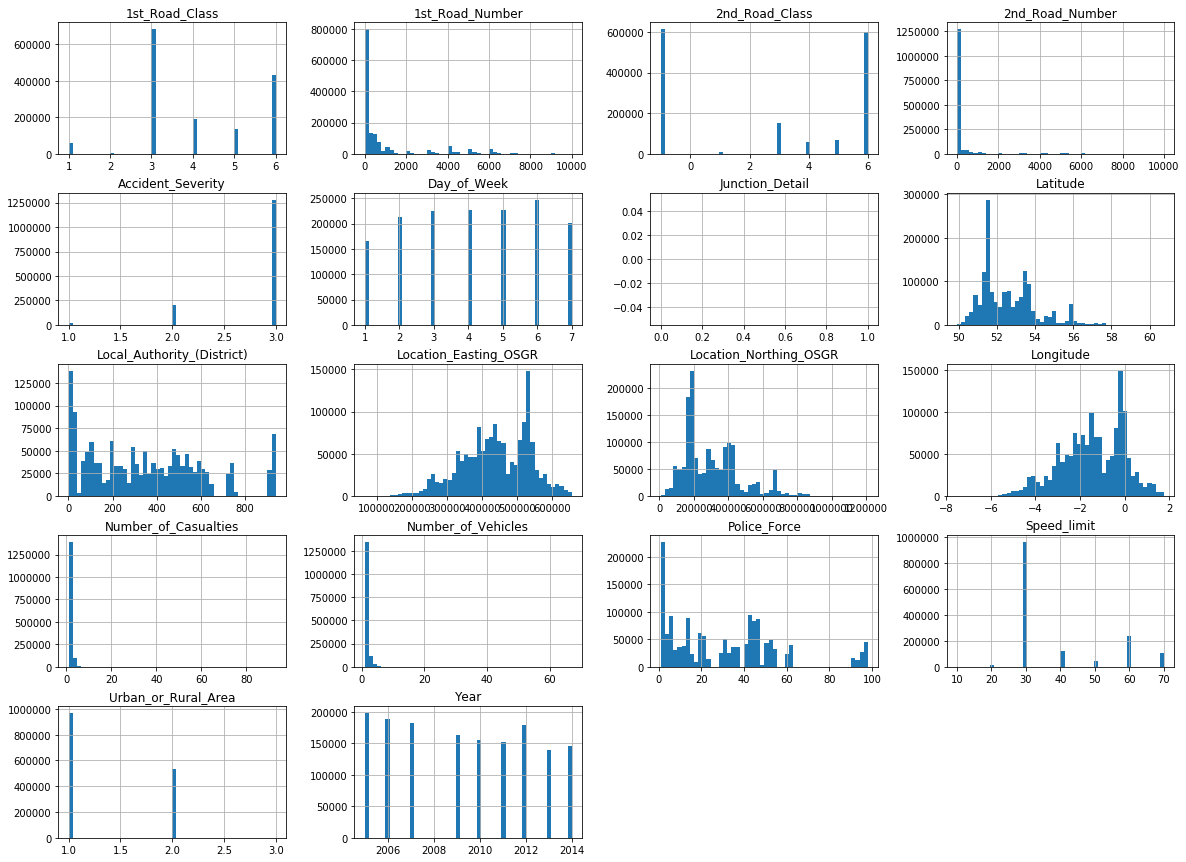

In [28]:
accident_data.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
#write the combinend data into a csv file
accident_data.to_csv('uk_accident_data.csv')

In [ ]:
import pandas as pd
import numpy as np
import calendar 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
aadf_data = pd.read_csv('ukTrafficAADF.csv')
aadf_data.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [8]:
aadf_data.isnull().sum()

AADFYear                          0
CP                                0
Estimation_method             37573
Estimation_method_detailed    37573
Region                            0
LocalAuthority                    0
Road                              0
RoadCategory                      0
Easting                           0
Northing                          0
StartJunction                   256
EndJunction                     238
LinkLength_km                     0
LinkLength_miles                  0
PedalCycles                       0
Motorcycles                       0
CarsTaxis                         0
BusesCoaches                      0
LightGoodsVehicles                0
V2AxleRigidHGV                    0
V3AxleRigidHGV                    0
V4or5AxleRigidHGV                 0
V3or4AxleArticHGV                 0
V5AxleArticHGV                    0
V6orMoreAxleArticHGV              0
AllHGVs                           0
AllMotorVehicles                  0
Lat                         

In [3]:
aadf_data.size

7986165

In [9]:
aadf_data.dtypes

AADFYear                        int64
CP                              int64
Estimation_method              object
Estimation_method_detailed     object
Region                         object
LocalAuthority                 object
Road                           object
RoadCategory                   object
Easting                         int64
Northing                        int64
StartJunction                  object
EndJunction                    object
LinkLength_km                 float64
LinkLength_miles              float64
PedalCycles                     int64
Motorcycles                     int64
CarsTaxis                       int64
BusesCoaches                    int64
LightGoodsVehicles              int64
V2AxleRigidHGV                  int64
V3AxleRigidHGV                  int64
V4or5AxleRigidHGV               int64
V3or4AxleArticHGV               int64
V5AxleArticHGV                  int64
V6orMoreAxleArticHGV            int64
AllHGVs                         int64
AllMotorVehi

In [10]:
aadf_data['AADFYear'] = pd.to_datetime(aadf_data['AADFYear'])

In [11]:
aadf_data.dtypes

AADFYear                      datetime64[ns]
CP                                     int64
Estimation_method                     object
Estimation_method_detailed            object
Region                                object
LocalAuthority                        object
Road                                  object
RoadCategory                          object
Easting                                int64
Northing                               int64
StartJunction                         object
EndJunction                           object
LinkLength_km                        float64
LinkLength_miles                     float64
PedalCycles                            int64
Motorcycles                            int64
CarsTaxis                              int64
BusesCoaches                           int64
LightGoodsVehicles                     int64
V2AxleRigidHGV                         int64
V3AxleRigidHGV                         int64
V4or5AxleRigidHGV                      int64
V3or4AxleA

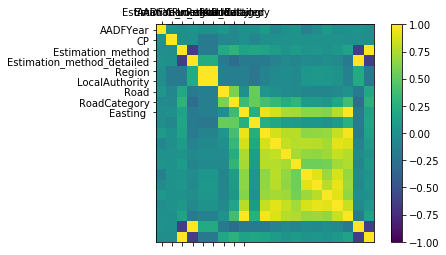

In [5]:
#correlation matrix
aadf_data_corr = aadf_data.corr()
#column names
col = ['AADFYear','CP','Estimation_method','Estimation_method_detailed', 'Region','LocalAuthority','Road','RoadCategory',
      'Easting ','Northing ','StartJunction','EndJunction','LinkLength_km','LinkLength_miles ','PedalCycles','Motorcycles',
      'CarsTaxis','BusesCoaches','LightGoodsVehicles','V2AxleRigidHGV','V3AxleRigidHGV ','V4or5AxleRigidHGV','V3or4AxleArticHGV',
      'V5AxleArticHGV','V6orMoreAxleArticHGV','AllHGVs','AllMotorVehicles','Lat','Lon']  
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(aadf_data_corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col)
ax.set_yticklabels(col)
plt.show()


In [6]:
aadf_data_corr["AllMotorVehicles"].sort_values(ascending=False)

AllMotorVehicles        1.000000
CarsTaxis               0.995124
LightGoodsVehicles      0.961809
V2AxleRigidHGV          0.897122
AllHGVs                 0.832084
V3AxleRigidHGV          0.780833
V4or5AxleRigidHGV       0.757942
V5AxleArticHGV          0.696964
V3or4AxleArticHGV       0.690266
V6orMoreAxleArticHGV    0.679634
Motorcycles             0.388279
BusesCoaches            0.267875
Lon                     0.153972
Easting                 0.152319
PedalCycles             0.025496
CP                      0.003606
AADFYear                0.001789
LinkLength_km          -0.120608
LinkLength_miles       -0.120615
Lat                    -0.178460
Northing               -0.179093
Name: AllMotorVehicles, dtype: float64

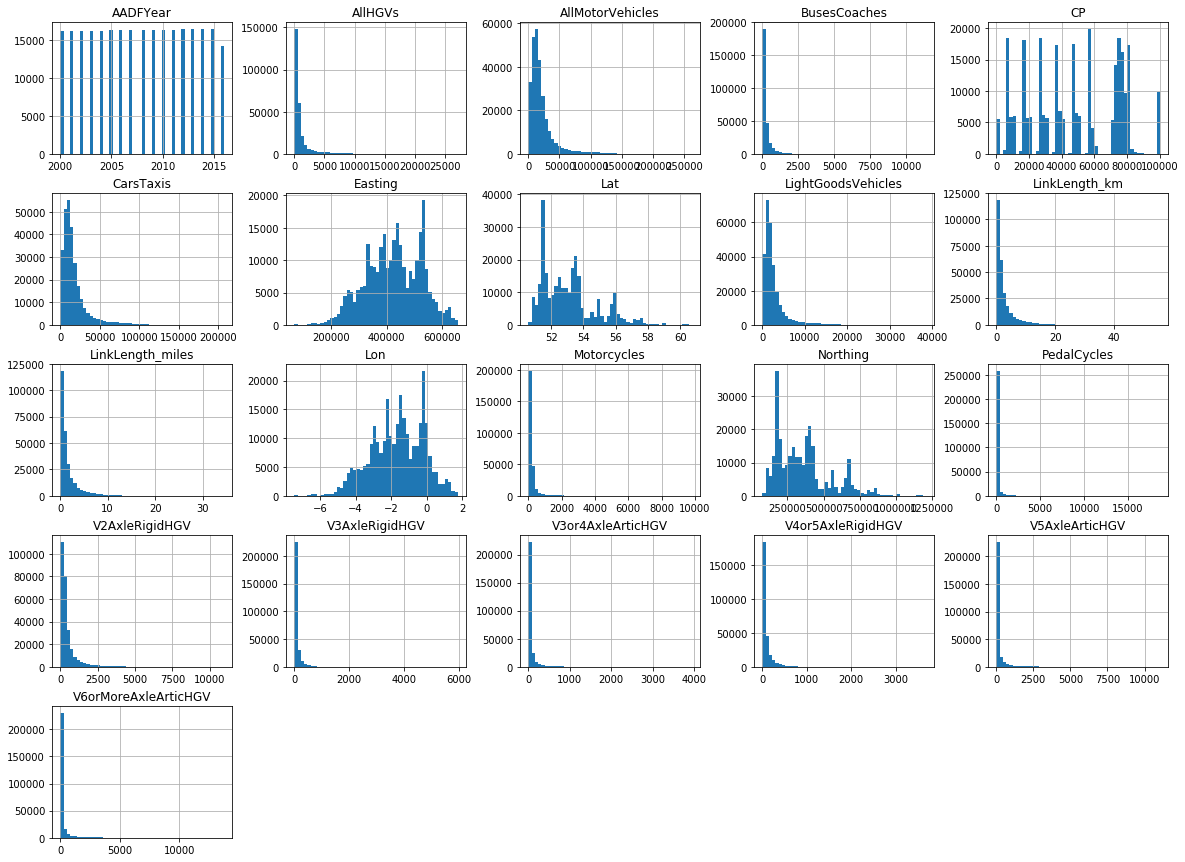

In [11]:
#histogram plot
aadf_data.hist(bins=50, figsize=(20,15))
plt.show()